In [25]:
import numpy as np
import pandas as pd
import sklearn
import csv
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [26]:
df_1 = pd.read_csv('data/info_1.csv', index_col=0)
train_df = pd.read_csv('data/train_1.csv', header=None)
test_df = pd.read_csv('data/train_1.csv', header=None)

X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [27]:
mlp = MLPClassifier(hidden_layer_sizes = (100,),activation = 'logistic',solver = 'sgd')
mlp.fit(X_train, y_train)


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [28]:
y_pred = mlp.predict(X_test)

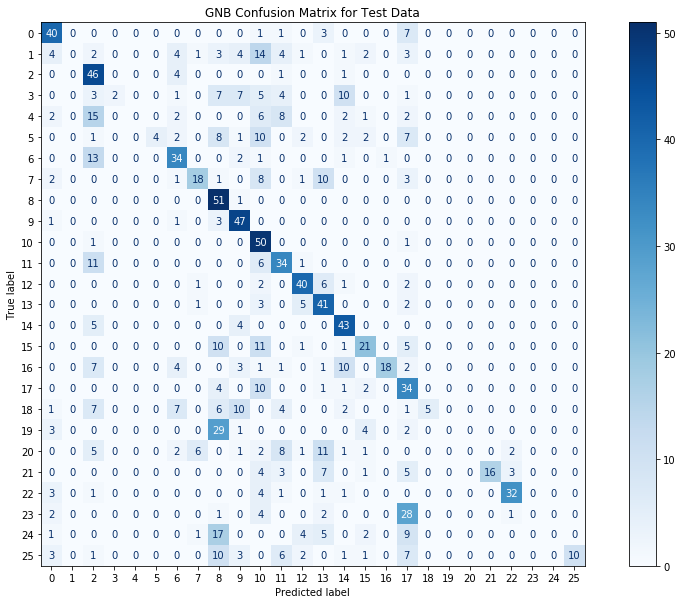

In [30]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# show confusion matrix plot
fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(mlp, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('GNB Confusion Matrix for Test Data')
plt.show()

In [31]:
df_1['precision'] = sklearn.metrics.precision_score(y_test, y_pred, average=None, zero_division=0)
df_1['recall'] = sklearn.metrics.recall_score(y_test, y_pred, average=None)
df_1['f1'] = sklearn.metrics.f1_score(y_test, y_pred, average=None)

df_1

,symbol,precision,recall,f1
index,,,,
0,A,0.645161,0.769231,0.701754
1,B,0.000000,0.000000,0.000000
2,C,0.389831,0.884615,0.541176
3,D,1.000000,0.050000,0.095238
4,E,0.000000,0.000000,0.000000
5,F,1.000000,0.102564,0.186047
6,G,0.548387,0.653846,0.596491
7,H,0.642857,0.409091,0.500000
8,I,0.340000,0.980769,0.504950


In [32]:
scores = [
    sklearn.metrics.accuracy_score(y_test, y_pred),
    sklearn.metrics.f1_score(y_test, y_pred, average='macro'),
    sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
]
model_desc = pd.DataFrame(scores, index=['accuracy', 'macro-average', 'weighted-average'], columns=['DS_1'])
model_desc

,DS_1
accuracy,0.489557
macro-average,0.393069
weighted-average,0.417847


In [33]:
%timeit df_1['new_col'] = range(1, len(df_1) + 1)
%timeit df_1['new_col'] = np.arange(1, df_1.shape[0] + 1)

46.7 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
